In [1]:
#!pip install -e .
import toySCRNAsim
import matplotlib.pyplot as plt
import numpy as np

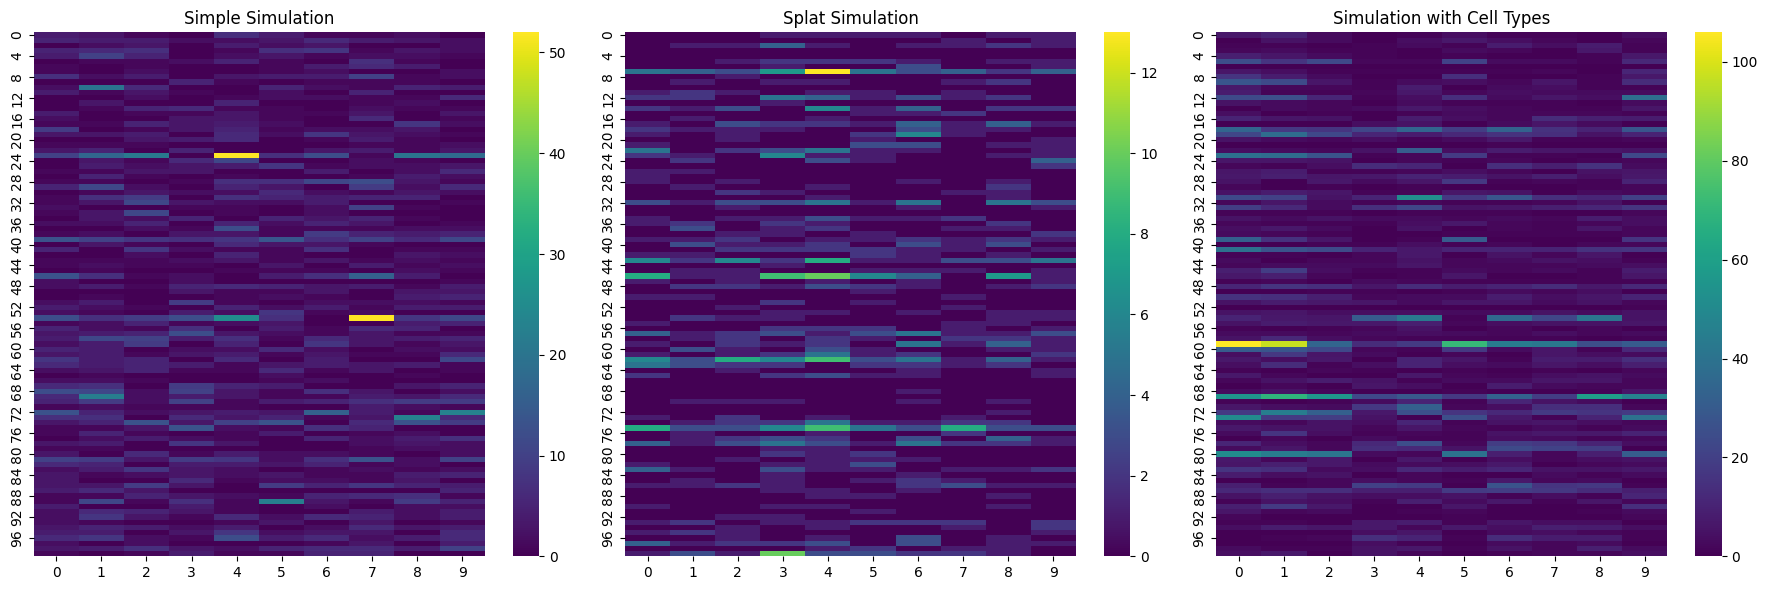

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate data using the three functions
simple_data = toySCRNAsim.simple_sim(N=10, G=100)
splat_data = toySCRNAsim.splat_sim(N=10, G=100)
sim_ct_data, cell_labels, de_info = toySCRNAsim.sim_with_cell_types(N=10, G=100,K=2)

# Visualize the heatmaps for the three datasets
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(simple_data.values, ax=axs[0], cmap='viridis')
axs[0].set_title('Simple Simulation')

sns.heatmap(splat_data.values, ax=axs[1], cmap='viridis')
axs[1].set_title('Splat Simulation')

sns.heatmap(sim_ct_data.values, ax=axs[2], cmap='viridis')
axs[2].set_title('Simulation with Cell Types')

plt.tight_layout()
plt.show()


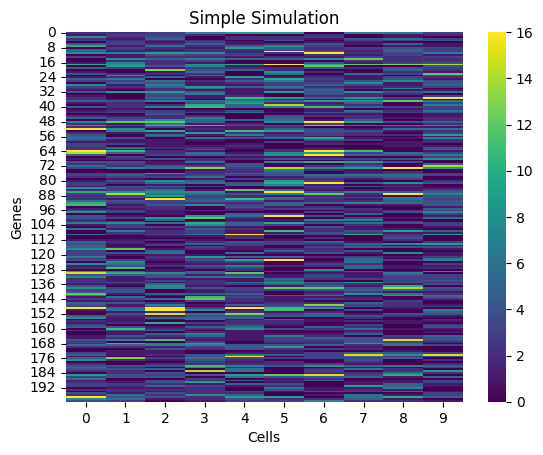

In [3]:
simple_data = toySCRNAsim.simple_sim(N=10, G=200)
sns.heatmap(simple_data.values, cmap='viridis',vmin=0, vmax=np.percentile(simple_data.values, 99))
plt.xlabel('Cells')
plt.ylabel('Genes')
plt.title('Simple Simulation')
plt.show()

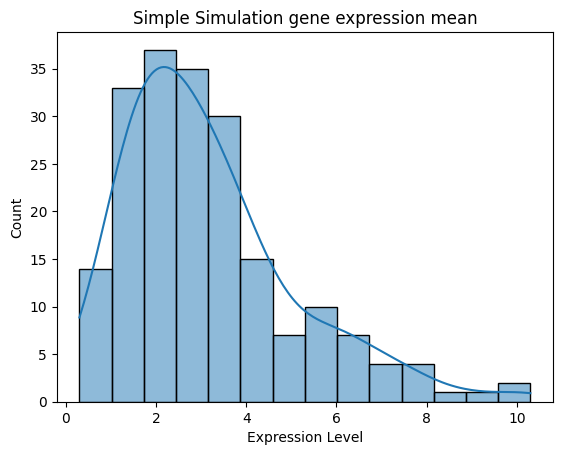

In [4]:
sns.histplot(simple_data.mean(axis=1), kde=True)
plt.title('Simple Simulation gene expression mean')
plt.xlabel('Expression Level')
plt.show()

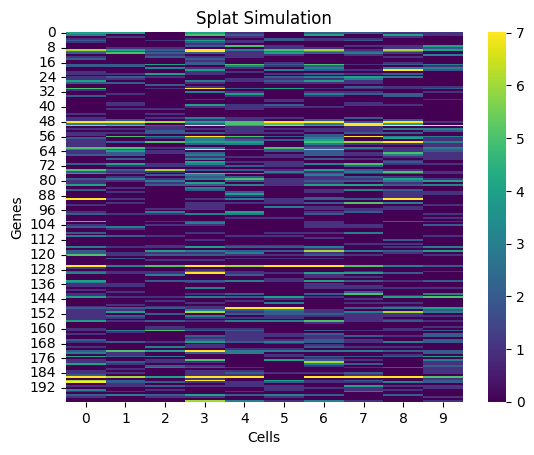

In [5]:
splat_data = toySCRNAsim.splat_sim(N=10, G=200)
sns.heatmap(splat_data.values, cmap='viridis',vmin=0, vmax=np.percentile(splat_data.values, 99))
plt.xlabel('Cells')
plt.ylabel('Genes')
plt.title('Splat Simulation')
plt.show()

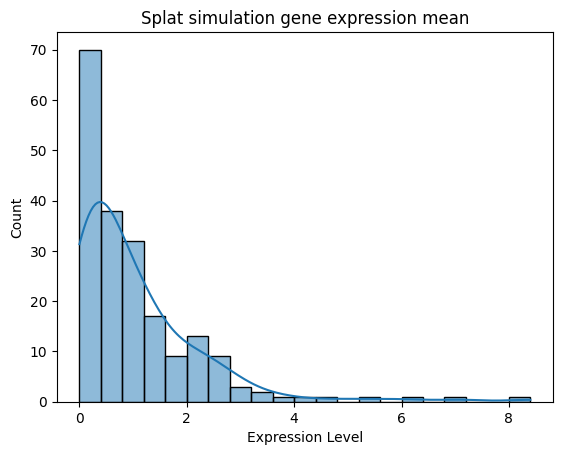

In [6]:
#plot hist of gene expression
sns.histplot(splat_data.mean(axis=1), kde=True)
plt.title('Splat simulation gene expression mean')
plt.xlabel('Expression Level')
plt.show()

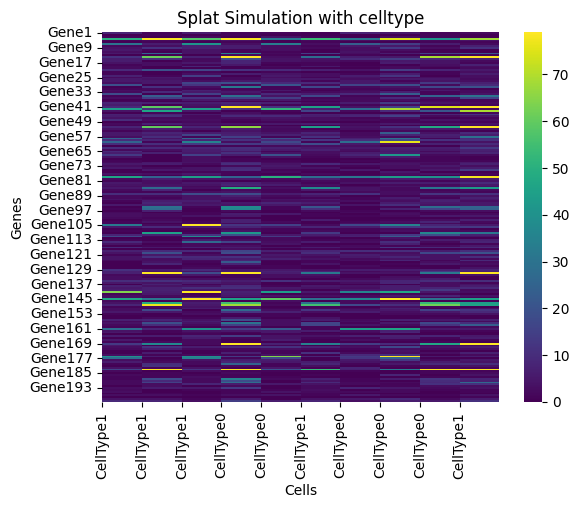

In [7]:
celltype_data = toySCRNAsim.sim_with_cell_types(N=10, G=200,K=2)

sns.heatmap(celltype_data[0], cmap='viridis',vmin=0, vmax=np.percentile(celltype_data[0].values, 99))
plt.xlabel('Cells')
plt.ylabel('Genes')
plt.xticks(range(10), cell_labels,rotation=90)
plt.title('Splat Simulation with celltype')
plt.show()

In [8]:
celltype_data[2]

,CellType0,CellType1
Gene1,False,True
Gene2,False,True
Gene3,True,False
Gene4,True,True
Gene5,False,False
...,...,...
Gene196,True,False
Gene197,False,False
Gene198,False,True
Gene199,False,False


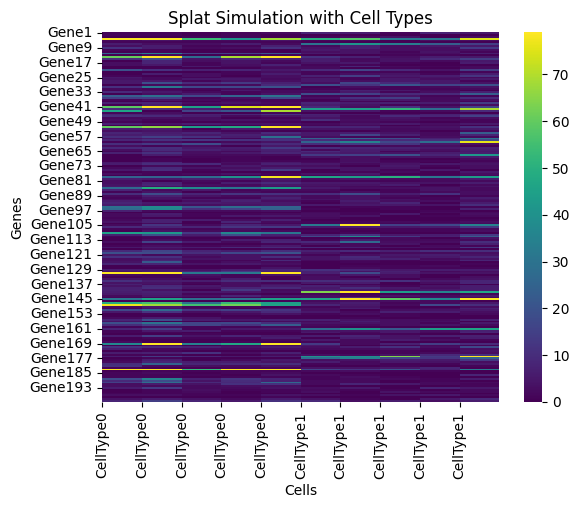

In [9]:
cell_labels = celltype_data[1].values
sorted_indices = np.argsort(cell_labels)
sorted_data = celltype_data[0].iloc[:, sorted_indices]
sns.heatmap(sorted_data, cmap='viridis', vmin=0, vmax=np.percentile(celltype_data[0].values, 99))
plt.xlabel('Cells')
plt.ylabel('Genes')
plt.xticks(ticks=range(10), labels=cell_labels[sorted_indices], rotation=90)
plt.title('Splat Simulation with Cell Types')
plt.show()


In [30]:
from sklearn.cluster import KMeans
celltype_data = toySCRNAsim.sim_with_cell_types(N=100, G=200,K=2)
kmeans = KMeans(n_clusters=2, random_state=0).fit(sorted_data.T)
kmeans.labels_

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int32)